# Predictive Modeling on Titanic Dataset

## Models Used : 
### 1. Support Vector Classifier(SVC)
### 2. Logistic Regression
### 3. Decision Tree
### 4. K Nearest Neighbors
### 5. Neural Network

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import scale, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPClassifier, MLPRegressor

### Loading Dataset and Describing

In [2]:
titanic = pd.read_csv('./Titanic_data.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Cleaning

In [4]:
titanic.set_index('PassengerId', inplace=True)
titanic.drop('Cabin', axis=1, inplace=True)
titanic.dropna(subset=['Embarked'], inplace=True)
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

data = titanic.copy()

titanic = pd.get_dummies(titanic, columns=["Sex", "Embarked"])

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Name        889 non-null    object 
 3   Age         889 non-null    float64
 4   SibSp       889 non-null    int64  
 5   Parch       889 non-null    int64  
 6   Ticket      889 non-null    object 
 7   Fare        889 non-null    float64
 8   Sex_female  889 non-null    uint8  
 9   Sex_male    889 non-null    uint8  
 10  Embarked_C  889 non-null    uint8  
 11  Embarked_Q  889 non-null    uint8  
 12  Embarked_S  889 non-null    uint8  
dtypes: float64(2), int64(4), object(2), uint8(5)
memory usage: 66.8+ KB


In [6]:
titanic.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


### Distribution of the 2 classes

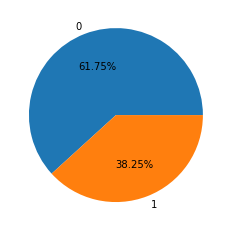

In [7]:
classes = titanic.groupby('Survived')['Survived'].count()

plt.pie(classes, labels=titanic['Survived'].unique(), autopct='%.2f%%')
plt.show()

### Identifying relevent features

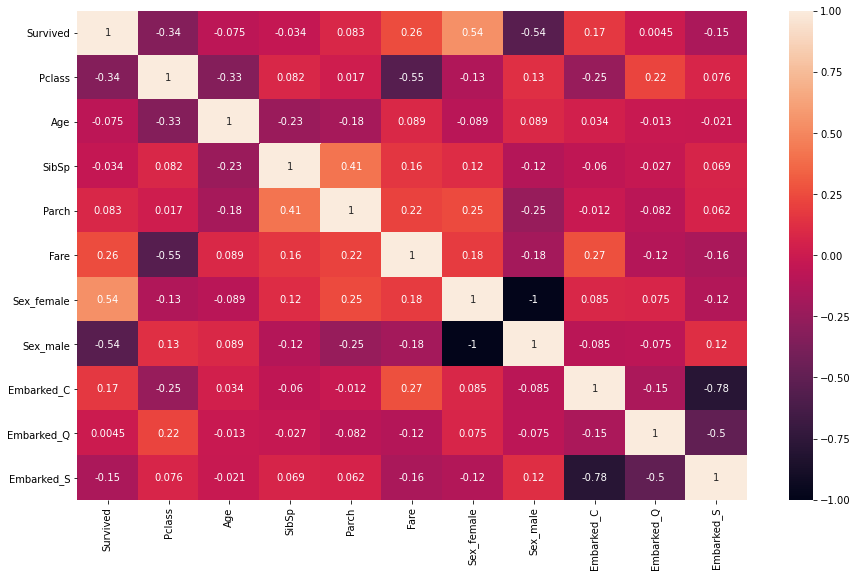

In [8]:
cor_mat = titanic.corr()

fig, axs = plt.subplots(nrows=1)
fig.set_size_inches(15, 9)
sns.heatmap(cor_mat, annot=True)
plt.show()

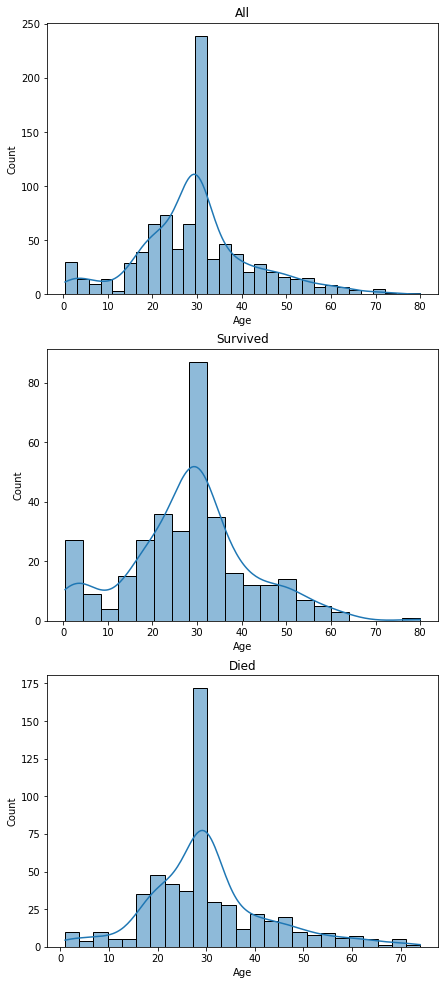

In [9]:
sur = titanic[titanic['Survived'] == 1]
died = titanic[titanic['Survived'] == 0]

fig, axs = plt.subplots(nrows=3)
fig.set_size_inches(7, 17)

p0 = sns.histplot(titanic['Age'], kde=True, ax=axs[0])
p0.set_title('All')
p1 = sns.histplot(sur['Age'], kde=True, ax=axs[1])
p1.set_title('Survived')
p2 = sns.histplot(died['Age'], kde=True, ax=axs[2])
p2.set_title('Died')

plt.show()

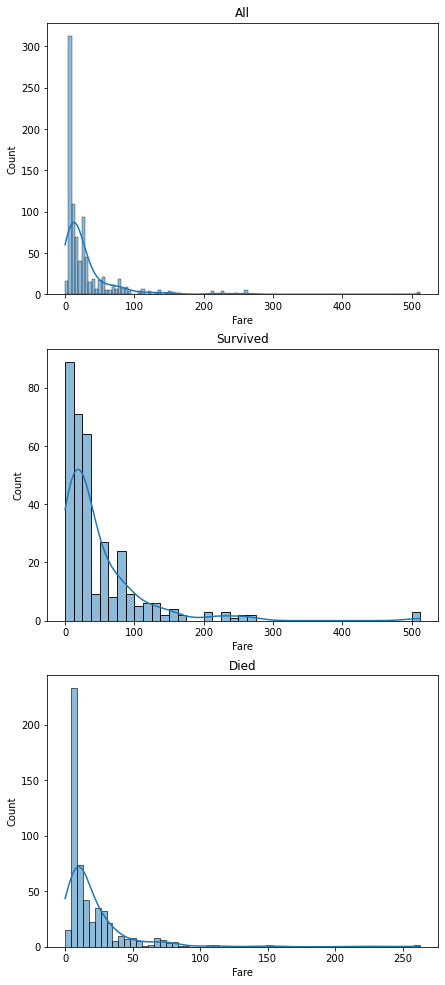

In [10]:
fig, axs = plt.subplots(nrows=3)
fig.set_size_inches(7, 17)

p0 = sns.histplot(titanic['Fare'], kde=True, ax=axs[0])
p0.set_title('All')
p1 = sns.histplot(sur['Fare'], kde=True, ax=axs[1])
p1.set_title('Survived')
p2 = sns.histplot(died['Fare'], kde=True, ax=axs[2])
p2.set_title('Died')

plt.show()

### Feature Selection and Standardising the data

In [11]:
std = scale(titanic[['Age', 'Embarked_Q', 'Embarked_C', 'Embarked_S', 'Sex_female', 'Sex_male']])
df_std = pd.DataFrame(std, columns=['Age', 'Embarked_Q', 'Embarked_C', 'Embarked_S', 'Sex_female', 'Sex_male'])

### Train and test split

In [12]:
train_x, test_x, train_y, test_y = train_test_split(df_std, titanic['Survived'], test_size=0.1)

# SVC

In [13]:
svc = SVC(kernel='poly')
svc.fit(train_x, train_y)

svc_y = svc.predict(test_x)

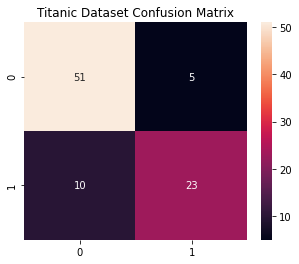

In [14]:
svc_cmat = confusion_matrix(test_y, svc_y)

fig = plt.figure(figsize=(5, 4))
plt.title('Titanic Dataset Confusion Matrix')
sns.heatmap(svc_cmat, annot=True)
plt.show()

In [15]:
svc_ip_y = svc.predict(train_x)
print('For Training Data : \n', classification_report(train_y, svc_ip_y))

For Training Data : 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       493
           1       0.73      0.68      0.70       307

    accuracy                           0.78       800
   macro avg       0.77      0.76      0.77       800
weighted avg       0.78      0.78      0.78       800



In [16]:
print('For Testing Data : \n', classification_report(test_y, svc_y))

For Testing Data : 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87        56
           1       0.82      0.70      0.75        33

    accuracy                           0.83        89
   macro avg       0.83      0.80      0.81        89
weighted avg       0.83      0.83      0.83        89



# Logistic Regression

In [17]:
lr = LogisticRegression()
lr.fit(train_x, train_y)

print('Model Coefficient : \n', lr.coef_)
print('MOdel Intercept : ', lr.intercept_)

lr_y = lr.predict(test_x)

Model Coefficient : 
 [[-0.10650826 -0.12502741  0.2257155  -0.11906369  0.58165777 -0.58165777]]
MOdel Intercept :  [-0.58579312]


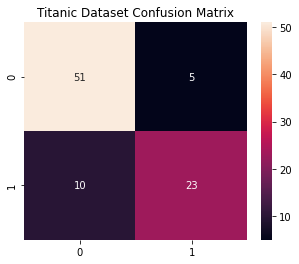

In [18]:
lr_cmat = confusion_matrix(test_y, lr_y)

fig = plt.figure(figsize=(5, 4))
plt.title('Titanic Dataset Confusion Matrix')
sns.heatmap(lr_cmat, annot=True)
plt.show()

In [19]:
lr_ip_y = lr.predict(train_x)
print('For Training Data : \n', classification_report(train_y, lr_ip_y))

For Training Data : 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       493
           1       0.73      0.68      0.70       307

    accuracy                           0.78       800
   macro avg       0.77      0.76      0.77       800
weighted avg       0.78      0.78      0.78       800



In [20]:
print('For Testing Data : \n', classification_report(test_y, lr_y))

For Testing Data : 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87        56
           1       0.82      0.70      0.75        33

    accuracy                           0.83        89
   macro avg       0.83      0.80      0.81        89
weighted avg       0.83      0.83      0.83        89



# Decision Tree

[Text(167.4, 181.2, 'X[5] <= -0.312\ngini = 0.473\nsamples = 800\nvalue = [493, 307]'),
 Text(83.7, 108.72, 'X[2] <= 0.794\ngini = 0.392\nsamples = 284\nvalue = [76, 208]'),
 Text(41.85, 36.23999999999998, 'gini = 0.427\nsamples = 220\nvalue = [68, 152]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.219\nsamples = 64\nvalue = [8, 56]'),
 Text(251.10000000000002, 108.72, 'X[0] <= -1.284\ngini = 0.31\nsamples = 516\nvalue = [417, 99]'),
 Text(209.25, 36.23999999999998, 'gini = 0.478\nsamples = 33\nvalue = [13, 20]'),
 Text(292.95, 36.23999999999998, 'gini = 0.274\nsamples = 483\nvalue = [404, 79]')]

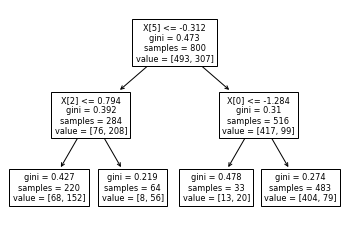

In [21]:
dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(train_x, train_y)

tree.plot_tree(dtree)

In [22]:
dtree_y = dtree.predict(test_x)

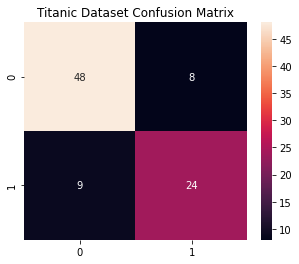

In [23]:
dtree_cmat = confusion_matrix(test_y, dtree_y)

fig = plt.figure(figsize=(5, 4))
plt.title('Titanic Dataset Confusion Matrix')
sns.heatmap(dtree_cmat, annot=True)
plt.show()

In [24]:
dtree_ip_y = dtree.predict(train_x)
print('For Training Data : \n', classification_report(train_y, dtree_ip_y))

For Training Data : 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       493
           1       0.72      0.74      0.73       307

    accuracy                           0.79       800
   macro avg       0.78      0.78      0.78       800
weighted avg       0.79      0.79      0.79       800



In [25]:
print('For Testing Data : \n', classification_report(test_y, dtree_y))

For Testing Data : 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        56
           1       0.75      0.73      0.74        33

    accuracy                           0.81        89
   macro avg       0.80      0.79      0.79        89
weighted avg       0.81      0.81      0.81        89



# KNN

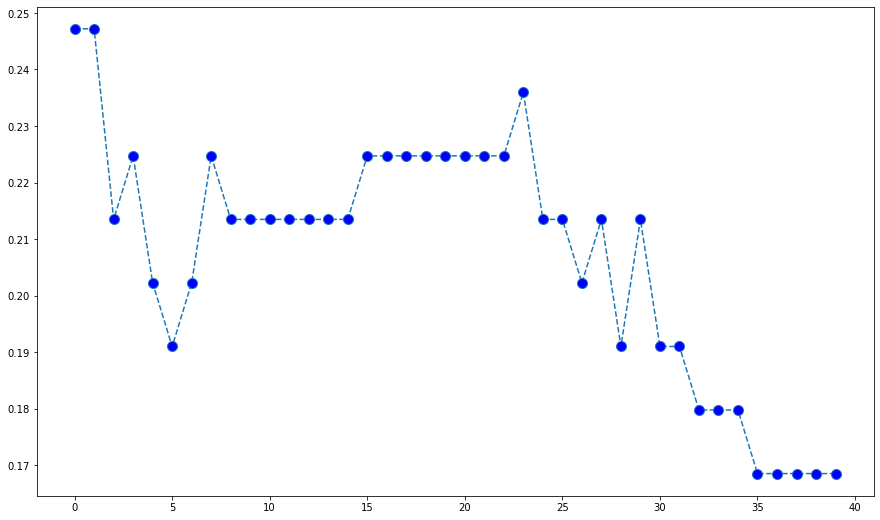

In [26]:
error_rate = []

for i in range(40):
    knn = knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(train_x, train_y)

    knn_y = knn.predict(test_x)
    
    error_rate.append(np.mean(knn_y != test_y))

n = 5
val = 10000
for i in range(10):
    if val > error_rate[i]:
        n = i+1
        val = error_rate[i]    
    
plt.figure(figsize=(15, 9))
plt.plot(range(0, 40), error_rate, linestyle='--', markersize=10, markerfacecolor='blue', marker='o')
plt.show()

In [27]:
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(train_x, train_y)

knn_y = knn.predict(test_x)

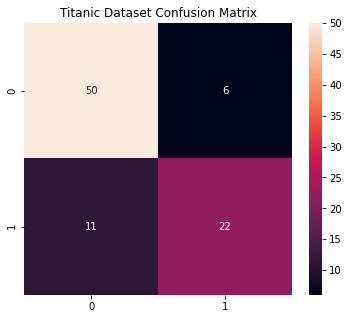

In [28]:
knn_cmat = confusion_matrix(test_y, knn_y)

fig = plt.figure(figsize=(6, 5))
plt.title('Titanic Dataset Confusion Matrix')
sns.heatmap(knn_cmat, annot=True)
plt.show()

In [29]:
knn_ip_y = knn.predict(train_x)
print('For Training Data : \n', classification_report(train_y, knn_ip_y))

For Training Data : 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       493
           1       0.78      0.65      0.71       307

    accuracy                           0.80       800
   macro avg       0.79      0.77      0.78       800
weighted avg       0.79      0.80      0.79       800



In [30]:
print('For Testing Data : \n', classification_report(test_y, knn_y))

For Testing Data : 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85        56
           1       0.79      0.67      0.72        33

    accuracy                           0.81        89
   macro avg       0.80      0.78      0.79        89
weighted avg       0.81      0.81      0.81        89



## Neural Network

In [31]:
# data = titanic[[]]
encode = OneHotEncoder().fit_transform(data).toarray()
x_train, x_test, y_train, y_test = train_test_split(encode, titanic['Survived'], test_size=0.1)

In [32]:
x_train.shape

(800, 1929)

In [33]:
# ['identity', 'logistic', 'relu', 'softmax', 'tanh']
mlp = MLPClassifier(hidden_layer_sizes=(8, 8), activation='relu', max_iter=500)
mlp.fit(x_train, y_train)
mlp_y = mlp.predict(x_test)

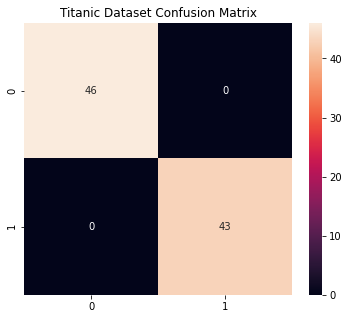

In [34]:
mlp_cmat = confusion_matrix(y_test, mlp_y)

fig = plt.figure(figsize=(6, 5))
plt.title('Titanic Dataset Confusion Matrix')
sns.heatmap(mlp_cmat, annot=True)
plt.show()

In [35]:
mlp_ip_y = mlp.predict(x_train)
print('For Training Data : \n', classification_report(y_train, mlp_ip_y))

For Training Data : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       503
           1       1.00      1.00      1.00       297

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [37]:
print('For Testing Data : \n', classification_report(y_test, mlp_y))

For Testing Data : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        43

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



In [40]:
lowest_ = [2, 4, 2, 1, 5, 6, 0.5, 7.8, 3.4, 6, 9]
lowers = {}

min_ind = np.where(lowest_ == np.min(lowest_))
lowers['identity'] = {str(min_ind[0]) : np.min(lowest_)}

{'identity': {'[6]': 0.5}}
